In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, FloatSlider

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

In [2]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
pd.options.display.width = 100
plt.style.use('ggplot')

In [3]:

df = pd.read_csv('creditcard.csv')
df.head()

,Time,Cardholder Name,Card Number,Card Issuer,CVV,Merchant Name,Merchant Category,Card Holder Age,User Account Age,User Transaction History,Credit Limit,Location of Transaction,IP Address of the device used in the transcation,Shipping Address,Billing Address,User Email Address,Merchant Email Address,User Phone Number,Merchant Phone Number,Country of Issuer,CVV Verification,Payment Gateway,Encryption Type,Merchant Affress,Co-Cardholders,Biometric Verification,Time of the transaction,Device Type,Type of Account linked to the card,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape
df.isnull().sum().sum()
df.describe()

,Time,Cardholder Name,Card Number,Card Issuer,CVV,Merchant Name,Merchant Category,Card Holder Age,User Account Age,User Transaction History,Credit Limit,Location of Transaction,IP Address of the device used in the transcation,Shipping Address,Billing Address,User Email Address,Merchant Email Address,User Phone Number,Merchant Phone Number,Country of Issuer,CVV Verification,Payment Gateway,Encryption Type,Merchant Affress,Co-Cardholders,Biometric Verification,Time of the transaction,Device Type,Type of Account linked to the card,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,7.092545e-13,1.874948e-12,1.053347e-12,7.127611e-13,-1.474791e-13,-5.231558e-13,-2.282250e-13,-6.425436e-13,4.950748e-13,7.057397e-13,1.766111e-12,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.dtypes

Time                                                float64
Cardholder Name                                     float64
Card Number                                         float64
Card Issuer                                         float64
CVV                                                 float64
Merchant Name                                       float64
Merchant Category                                   float64
Card Holder Age                                     float64
User Account Age                                    float64
User Transaction History                            float64
Credit Limit                                        float64
Location of Transaction                             float64
IP Address of the device used in the transcation    float64
Shipping Address                                    float64
Billing Address                                     float64
User Email Address                                  float64
Merchant Email Address                  

Valid Vs Fraud Transactions

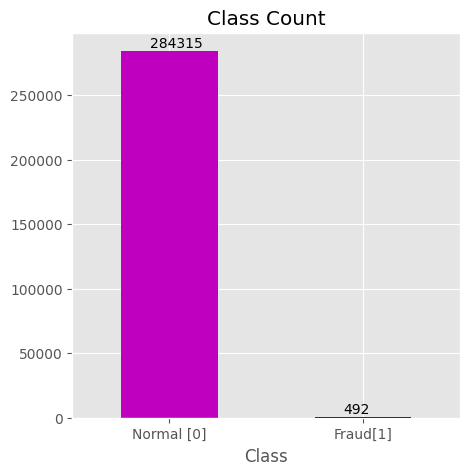

In [6]:
diff_class = df['Class'].value_counts()
diff_class.plot(kind ='bar', color=['m','k'], figsize = (5,5))
plt.xticks(range(2),['Normal [0]', 'Fraud[1]'], rotation =0)
for i, v in enumerate(diff_class):
  plt.text(i-0.1, v+3000, str(v))
plt.title('Class Count')
plt.show()

Correlation Heatmap

<Axes: >

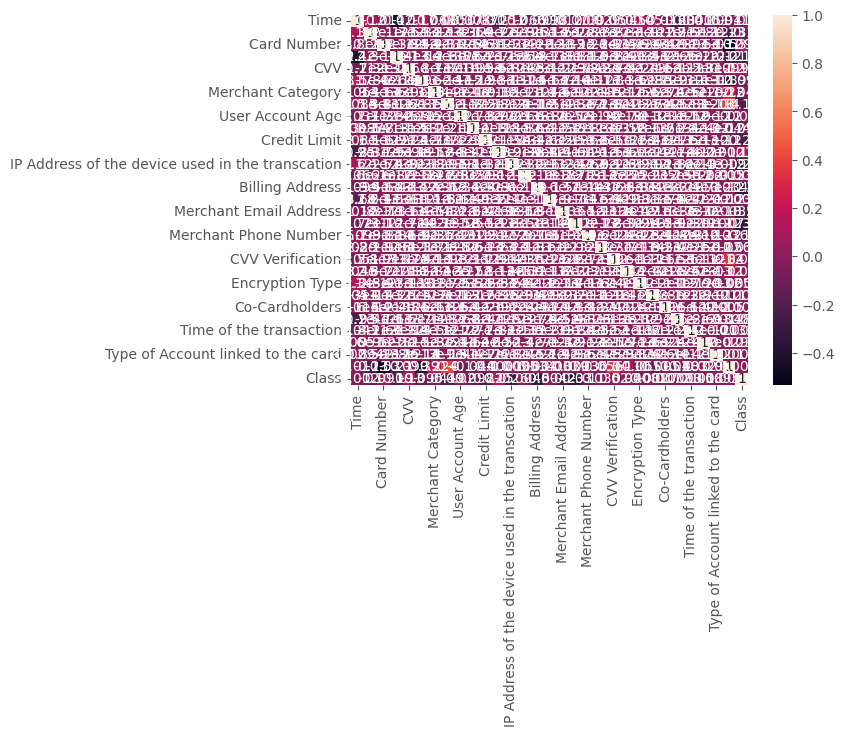

In [7]:
sns.heatmap(df.corr(), annot=True)

In [8]:
ss = StandardScaler()
df['Amount'] = ss.fit_transform(df[['Amount']])
df['Time'] = ss.fit_transform(df[['Time']])


Distribution of DIfferent Columns

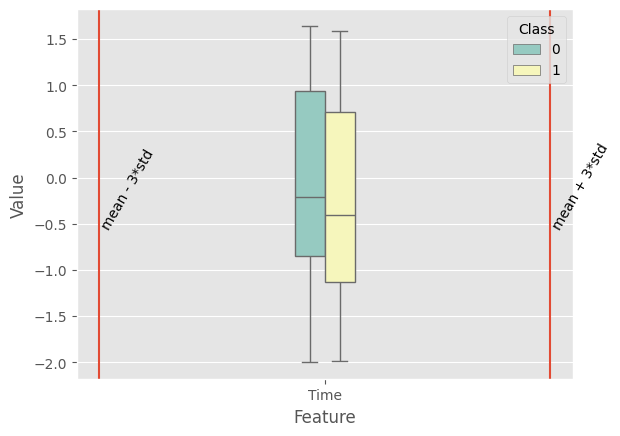

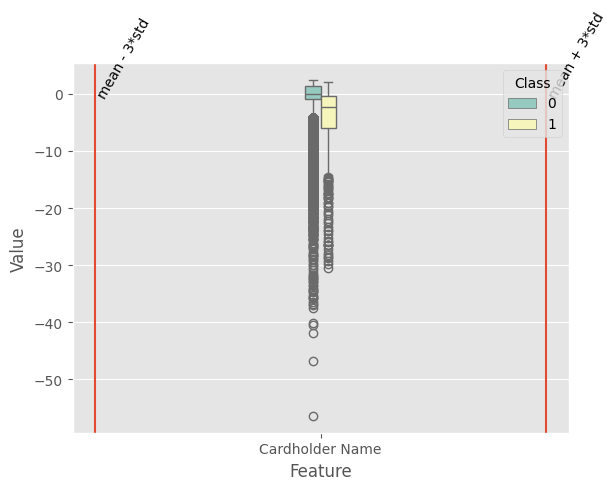

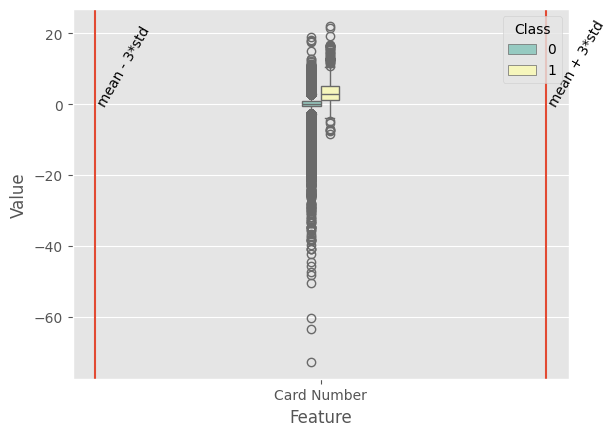

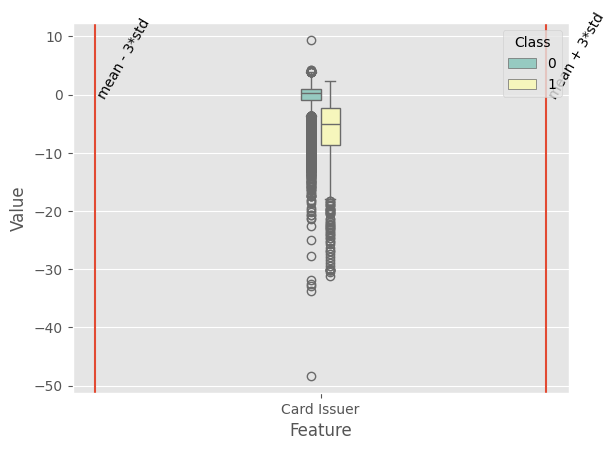

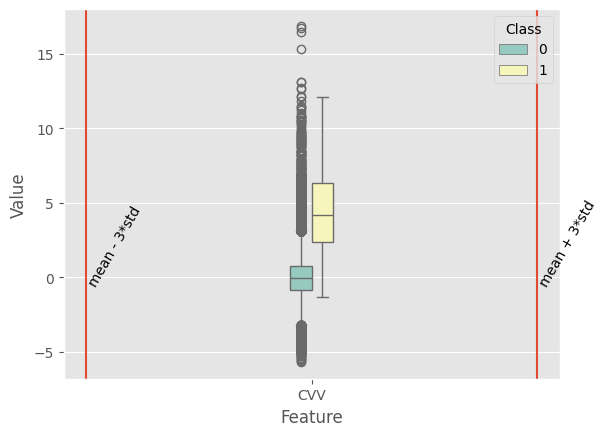

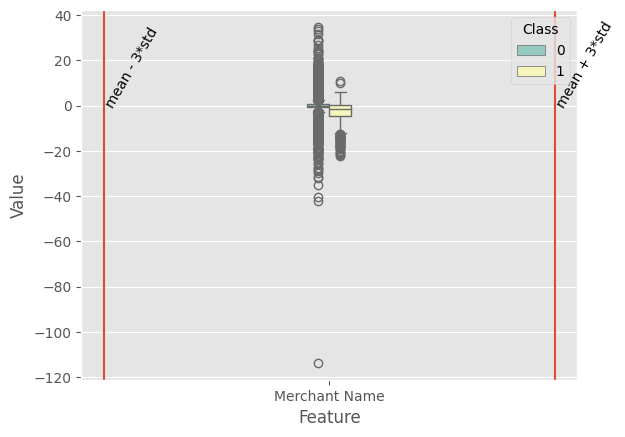

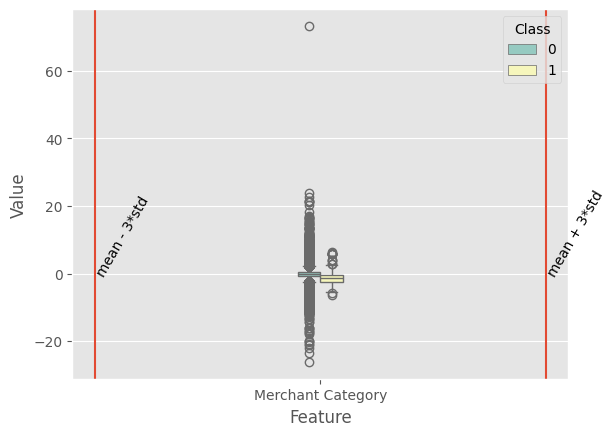

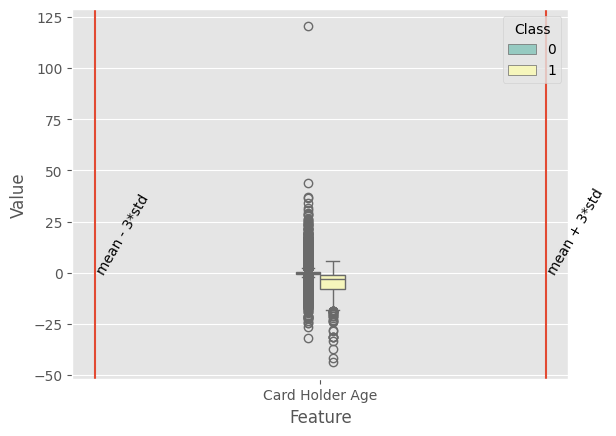

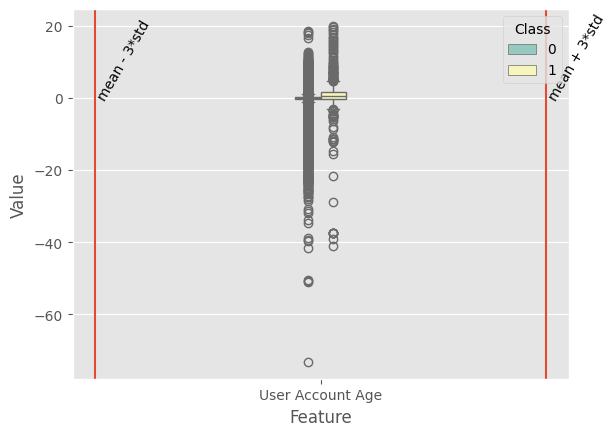

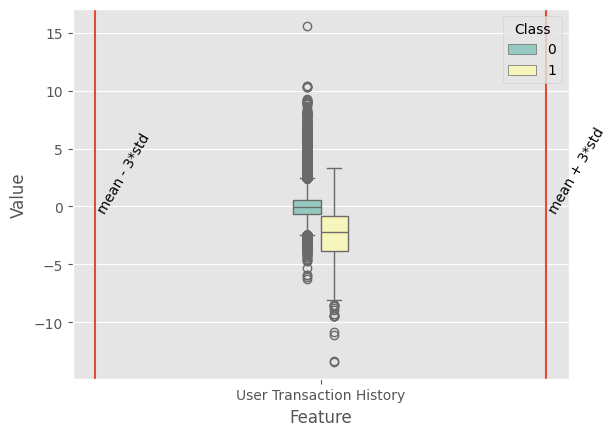

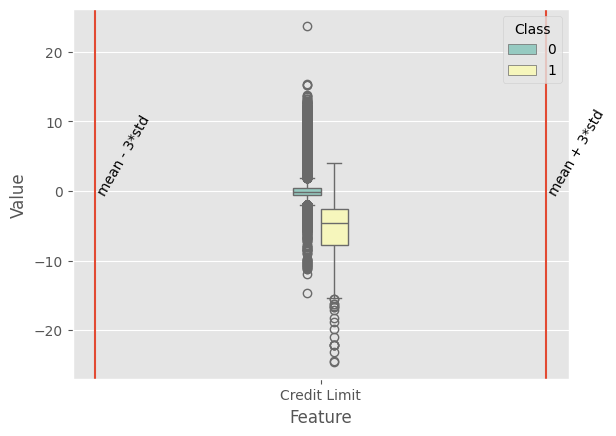

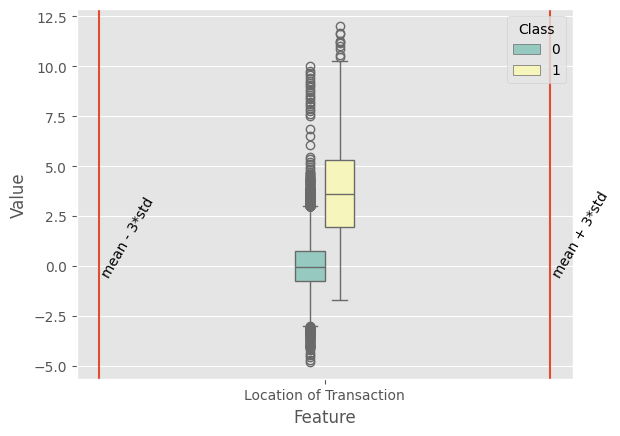

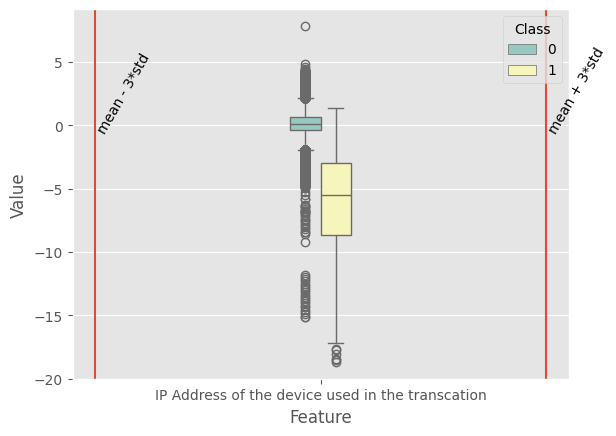

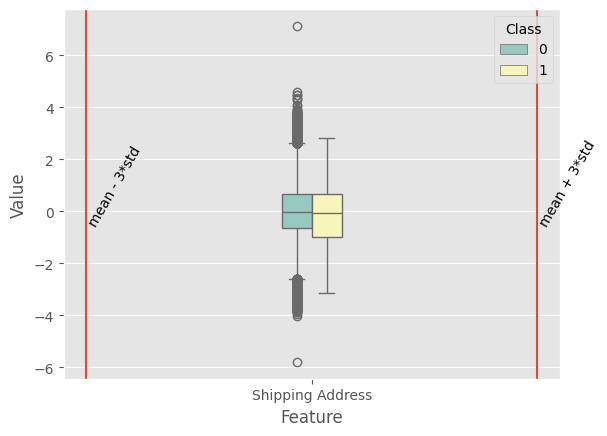

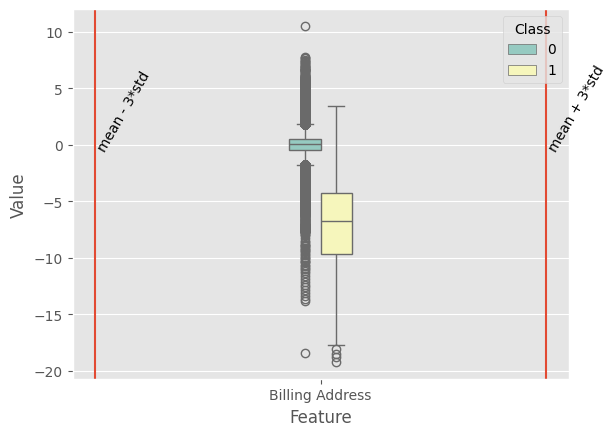

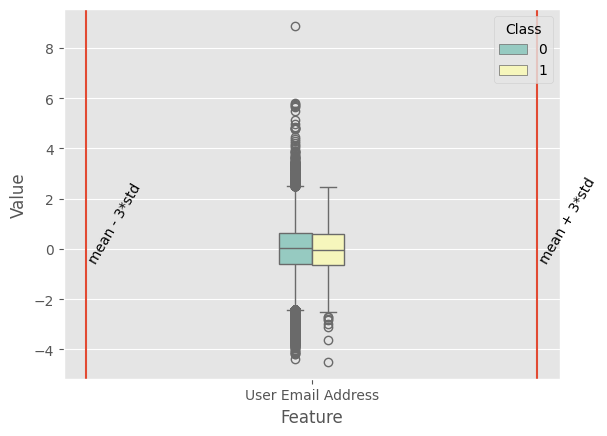

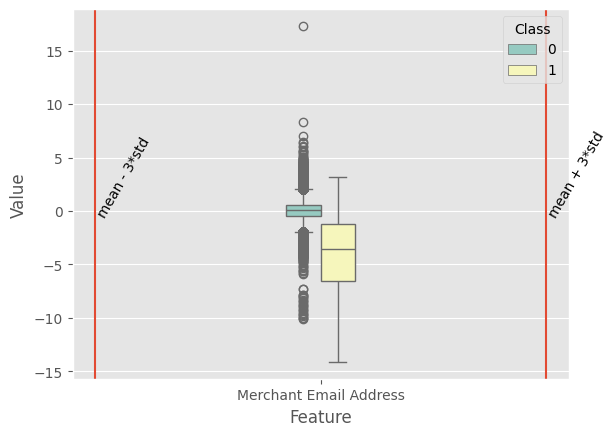

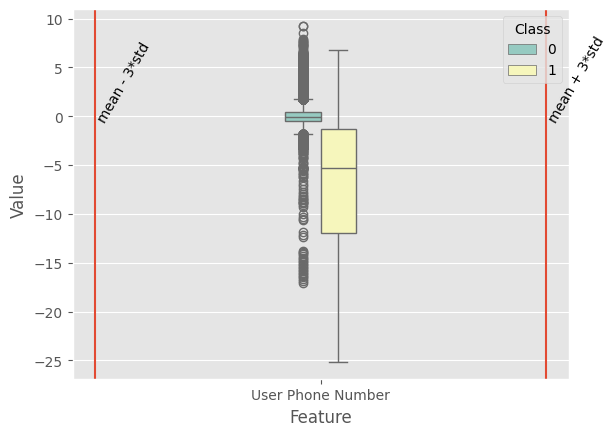

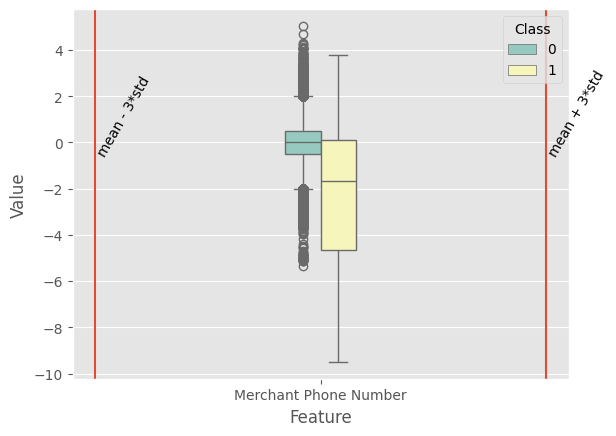

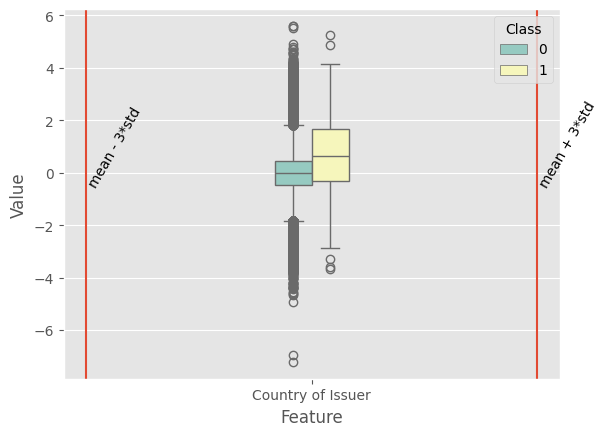

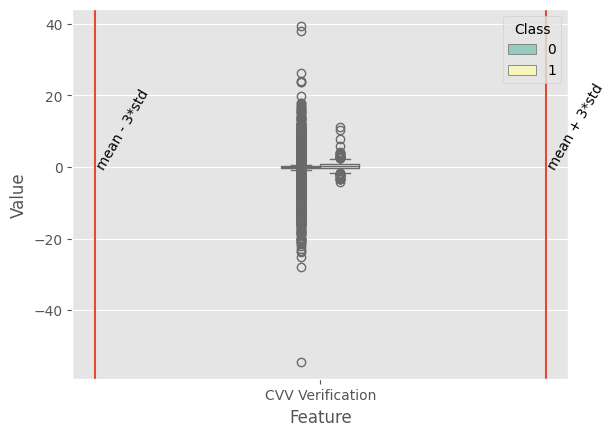

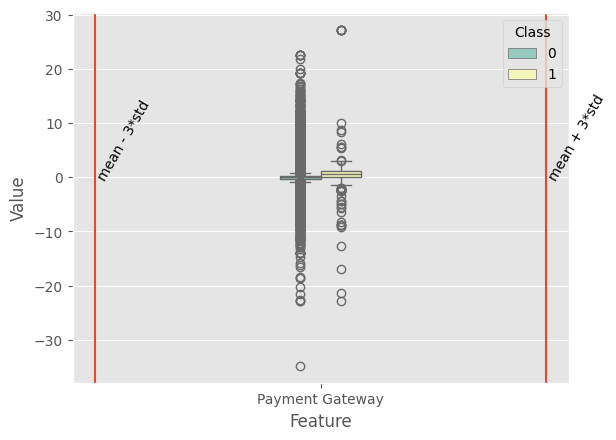

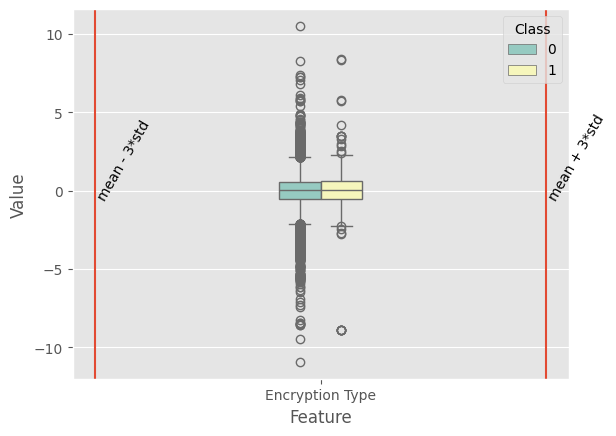

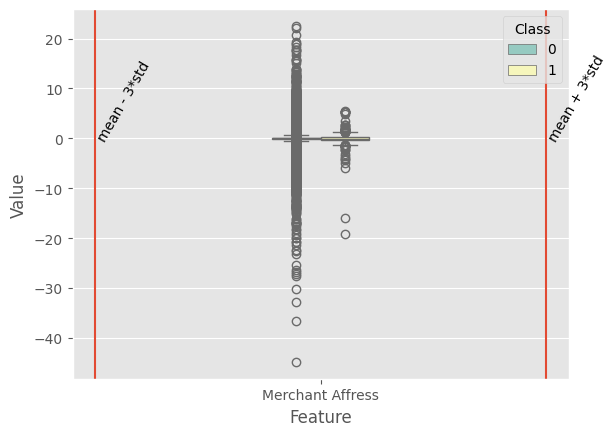

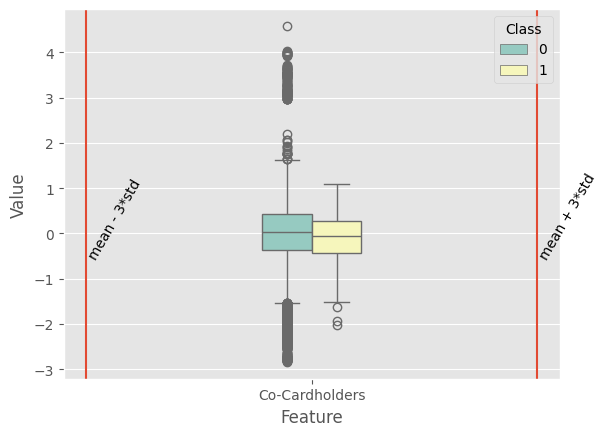

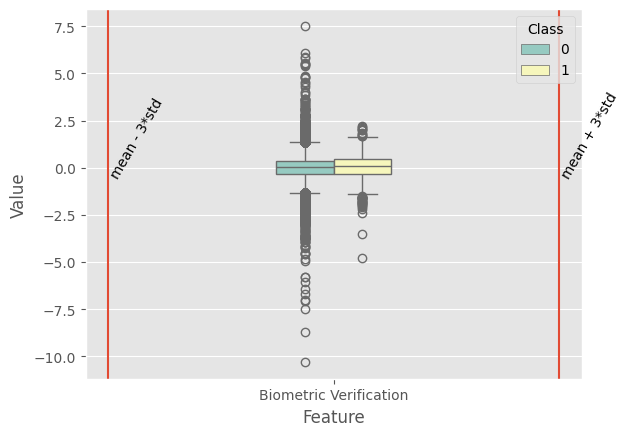

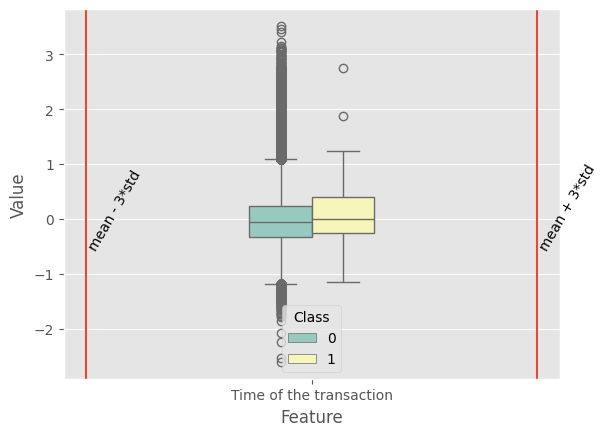

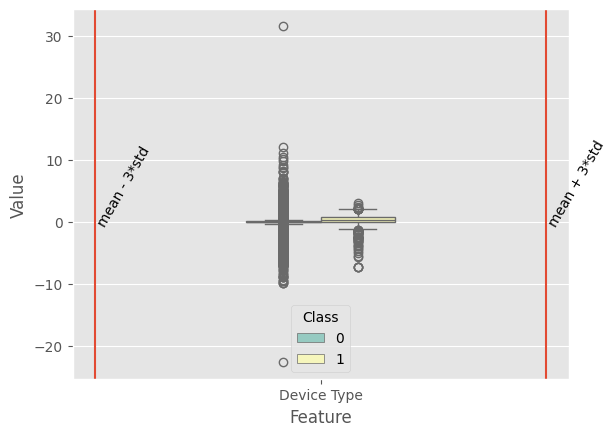

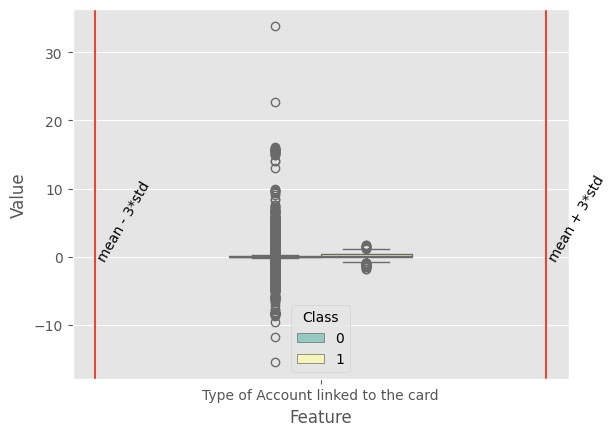

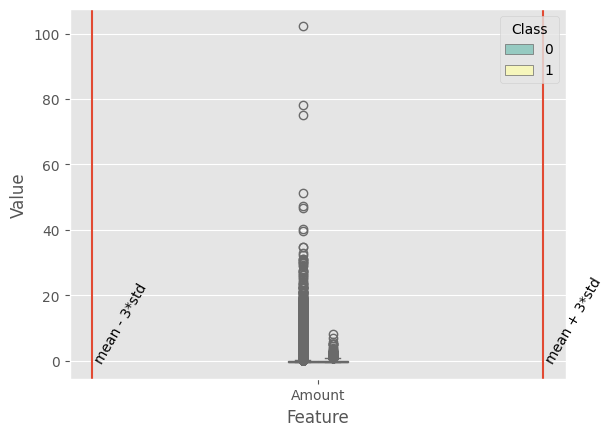

In [9]:
melted_data = pd.melt(df, id_vars=['Class'], value_vars=df.columns[:-1], var_name='Feature', value_name='Value')

# Plot boxplots with 'Class' as the hue
for var in df.columns[:-1]:
    sns.boxplot(data=melted_data[melted_data['Feature'] == var], x='Feature', y='Value', hue='Class', palette='Set3')
    mean = melted_data[melted_data['Feature'] == var]['Value'].mean()
    std = melted_data[melted_data['Feature'] == var]['Value'].std()
    plt.axvline(mean - 3 * std, 0, 1)
    plt.text(mean - 3 * std, -0.55, 'mean - 3*std', rotation=60)
    plt.axvline(mean + 3 * std, 0, 1)
    plt.text(mean + 3 * std, -0.55, 'mean + 3*std', rotation=60)
    plt.show()

Data split in training and test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df[['Class']].values, test_size=0.3,random_state=1997)

1. Logistic Regression

In [11]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


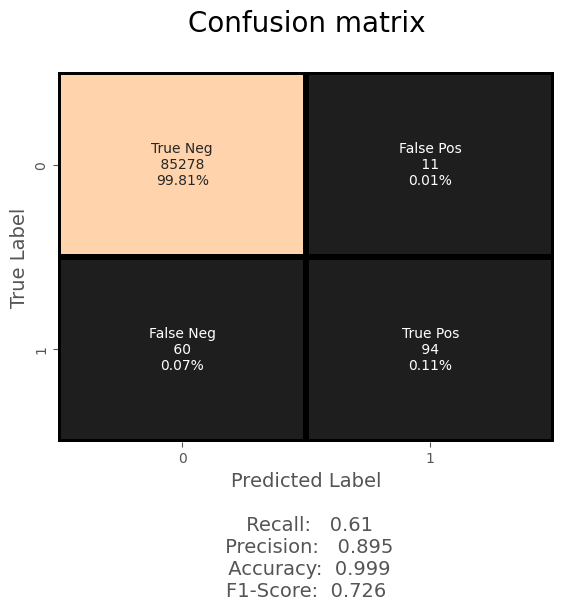

In [12]:
def plot_confusion_matrix(y_test, y_pred):
    cf_matrix = confusion_matrix(y_test, y_pred)

    labels_name = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    labels_count = [value for value in cf_matrix.flatten()]
    labels_percentage = [ "{0:.2%}".format(value) for value in cf_matrix.flatten()/ np.sum(cf_matrix)]

    labels = [f'{x}\n {y} \n{z}' for x, y, z in zip(labels_name, labels_count, labels_percentage)]
    labels = np.array(labels, dtype=str).reshape(2,2)

    recall = cf_matrix[1,1]/(cf_matrix[1,0] + cf_matrix[1,1])
    precision = cf_matrix[1,1]/(cf_matrix[0,1] + cf_matrix[1,1])
    accuracy = (cf_matrix[0, 0] + cf_matrix[1,1])/ np.sum(cf_matrix)
    f1_score = (2*precision*recall)/(precision + recall)

    stats = '\n\n Recall:   {0:.03}\n Precision:   {1:.03}\n Accuracy:  {2:.03}\nF1-Score:  {3:.03}'.format(recall, precision, accuracy, f1_score)

    sns.heatmap(cf_matrix, annot=labels, fmt='', center=3, linewidth=3, linecolor='k', cbar=False)
    plt.title('Confusion matrix\n', fontsize=20)
    plt.xlabel('Predicted Label'+stats, fontsize=14)
    plt.ylabel('True Label', fontsize=14)

    plt.show()
plot_confusion_matrix(y_test, y_pred)

1. Upper Left Square: The amount of correctly classified by model of no fraud transactions.

2. Upper Right Square: The amount of incorrectly classified transactions as fraud cases, but the actual label is no fraud .

3. Lower Left Square: The amount of incorrectly classified transactions as no fraud cases, but the actual label is fraud .

4. Lower Right Square: The amount of correctly classified by our model of fraud transactions.

5. Recall: Out of all the positive classes, how much we predicted correctly. (TP/TP+FN)

6. Precision: Out of all the positive classes we have predicted, how many are actually positive. (TP/TP+FP)

7. Accuracy: Out of all the classes, how much we predicted correctly

8. F-measure: 2(Recall) (Precision)/(Recall + Precision)









# Predict Probability

predict_proba gives you the probabilities for the target (0 and 1 in this case) in array form. The number of probabilities for each row is equal to the number of categories in target variable.

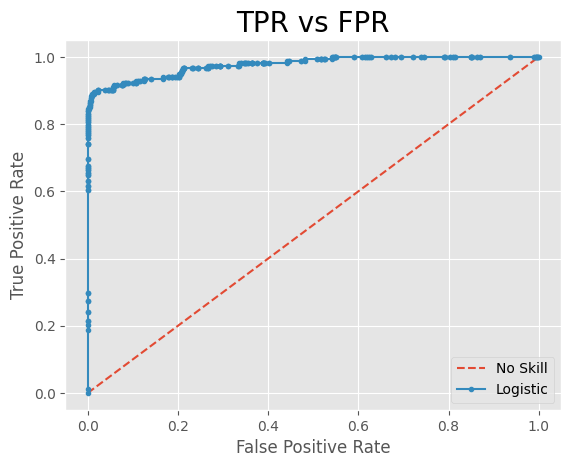

In [13]:
y_prob = lr.predict_proba(X_test)
y_prob = y_prob[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('TPR vs FPR', fontsize=20)
plt.show()

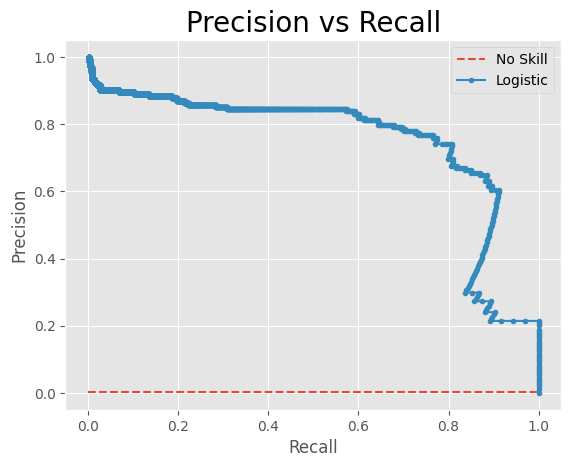

In [14]:
lr_precision, lr_recall, lr_thresholds = precision_recall_curve(y_test, y_prob)
no_skill = len(y_test[y_test==1])/ len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_precision, lr_recall, marker='.', label='Logistic')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision vs Recall', fontsize=20)
plt.show()

# Change of Threshold

In [15]:
print("Slide, Range -> (0.001, 0.04)")
def update(var=0.004):
    print("y_prob should be greater than >", var)
    predict_mine = np.where(y_prob > var, 1, 0)
    plot_confusion_matrix(y_test, predict_mine)

interact(update, var=FloatSlider(min=0.001, max=0.04, step=0.001))

Slide, Range -> (0.001, 0.04)


interactive(children=(FloatSlider(value=0.001, description='var', max=0.04, min=0.001, step=0.001), Output()),…

<function __main__.update(var=0.004)>

# Logistic Regression with balanced class weight

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


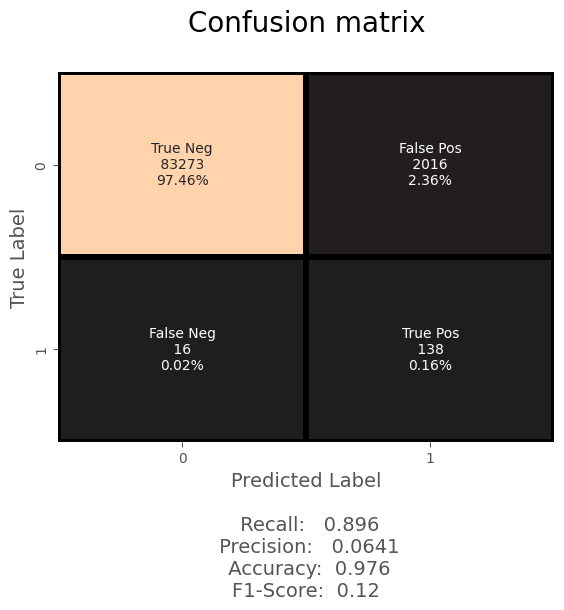

In [16]:
lr_b = LogisticRegression(max_iter=1000, class_weight='balanced')
lr_b.fit(X_train, y_train)
y_pred_b = lr_b.predict(X_test)
plot_confusion_matrix(y_test, y_pred_b)

# Tomek Link

In [ ]:
from imblearn.under_sampling import TomekLinks

# Create an instance of TomekLinks
tl = TomekLinks(sampling_strategy='majority')

# Perform the undersampling
X_train_tl, y_train_tl = tl.fit_resample(X_train, y_train)

# Train the LogisticRegression model on the undersampled data
lr_tl = LogisticRegression(max_iter=1000, class_weight='balanced')
lr_tl.fit(X_train_tl, y_train_tl)
y_pred_tl = lr_tl.predict(X_test)
plot_confusion_matrix(y_test, y_pred_tl)

# Synthetic Minority Oversampling Technique( SMOTE)

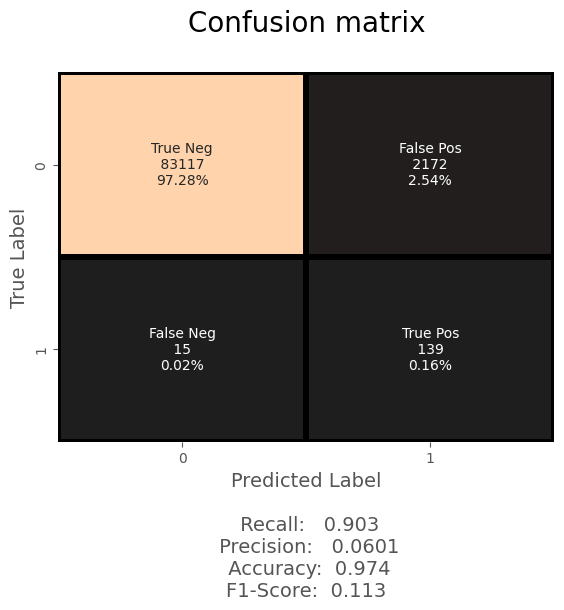

In [18]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smote = SMOTE(sampling_strategy='minority')

# Perform the oversampling
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Train the LogisticRegression model on the oversampled data
lr_sm = LogisticRegression(max_iter=1000)
lr_sm.fit(X_train_sm, y_train_sm)
y_pred_sm = lr_sm.predict(X_test)
plot_confusion_matrix(y_test, y_pred_sm)